# Requirements

For Assignment 2, you will perform a short pilot study that identifies a cultural pattern related to your final project.
Your submission should be in a Jupyter notebook format and address the following questions.

1. (1 Point) Construct a final project research question related to the interpretation of a cultural pattern that 
interests you (i.e. "Why is #ThrowbackThursday employed in a different way by Group A than it is by Group B?").

2. (2 Points) What digital data could you use to study this phenomenon and answer your research question? 
How could you collect this data? Consult the Final Project Assignment Page for several data search tools and feel free
to talk with your instructor or TA if you have any further questions about how you might find and collect data related
to your research question.

3. (3 Points) Download this data on your computer (if you are web-scraping, or have an exceptionally challenging data
source to gather from and analyze, you may choose to download only a subset of the data for the purposes of this 
assignment) and load it into your Python Jupyter notebook. Print out a small sample of your data in your Jupyter 
notebook (i.e. using the .head() command, if you're using Pandas).

4. (6 Points) Using your data, empirically demonstrate in Python that the cultural phenomenon you are studying consists 
of replicas from a common legisign, with the same interpretants and sign relations. Make at least 1 plot to aid in your
demonstration.

5. (3 Points) Provide a 300+ word description explaining why your Python code and plot successfully demonstrate that the cultural
phenomenon you are studying consists of replicas from a common legisign. What are your next steps beyond 
this basic identification of a cultural pattern? Do you need to gather any additional information? Do you need to 
perform any additional analyses in order to successfully answer your research question? How will these additional 
sources and/or analyses enable you to answer your research question? Provide a 200+ word response to these questions.

# Research Question

Do the Chinese people have a greater tolerance of inequality than the Americans? If so, what factors contribute to this
cultural phenomenon?

# Data Source

The [World Values Survey](www.worldvaluessurvey.org), which started in 1981, consists of nationally representative 
surveys conducted in almost 100 countries which contain almost 90 percent of the world’s population, using a common 
questionnaire. It is the largest non-commercial, cross-national, time series investigation of human beliefs and values 
ever executed, currently including interviews with almost 400,000 respondents and covering all of the world's major 
cultural zones.

Data used in this project is from WVS Wave 6 (2010-2014). For the purpose of a comparison between China and the United States, 
I selected Mainland China, Hong Kong, Taiwan and the United States for analysis. Raw data files are stored in this 
[folder](Data_raw).

# Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [9]:
# Run Python script
%run -i tidying.py

display(WVS_dataset)

,CountryRegion,Family,Friends,Leisure,Politics,Work,Religion,Happiness,Health,Satisfaction,...,Confidence_govern,Confidence_parties,Democracy_state_income_equal,Democracy_importance,Democracy_reality,Human_rights,Social_class,Income_scale,Sex,Age
0,Sweden,1,1,1,3,1,2,2,1,8,...,1,2,1,10,9,2,3,5,2,38
1,Sweden,1,2,3,3,2,2,2,2,5,...,3,3,1,10,8,3,2,5,2,51
2,Sweden,1,1,2,3,2,4,1,2,8,...,2,3,1,8,8,2,2,7,1,70
3,Sweden,1,1,2,3,2,3,2,3,5,...,4,4,5,6,6,3,3,6,2,21
4,Sweden,1,1,1,2,2,3,1,1,9,...,2,2,1,10,8,2,3,5,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89560,Georgia,1,2,1,2,1,1,2,2,7,...,2,3,7,10,7,2,3,5,1,45
89561,Georgia,1,1,1,1,1,1,2,1,10,...,2,3,10,10,10,2,3,1,1,36
89562,Georgia,1,1,2,2,1,1,1,1,7,...,4,4,7,10,5,1,2,1,2,33
89563,Georgia,1,1,4,1,1,1,2,3,10,...,4,4,1,10,7,2,5,2,1,37


# Semiotics

In [12]:
WVS_dataset_mean = WVS_dataset.groupby('CountryRegion').mean()

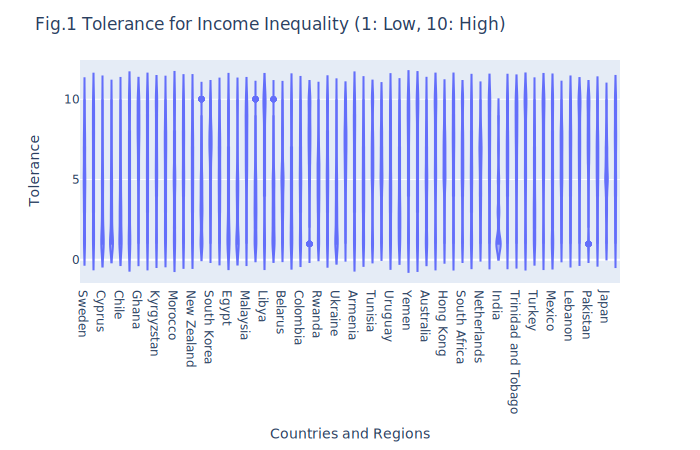

In [10]:
fig = px.violin(WVS_dataset[WVS_dataset['Income_equality']>0],
                x = 'CountryRegion',
                y = 'Income_equality',
                box = True)

fig.update_layout(title = 'Fig.1 Tolerance for Income Inequality (1: Low, 10: High)',
                  xaxis_title = 'Countries and Regions',
                  yaxis_title = 'Tolerance')

fig.show('svg')

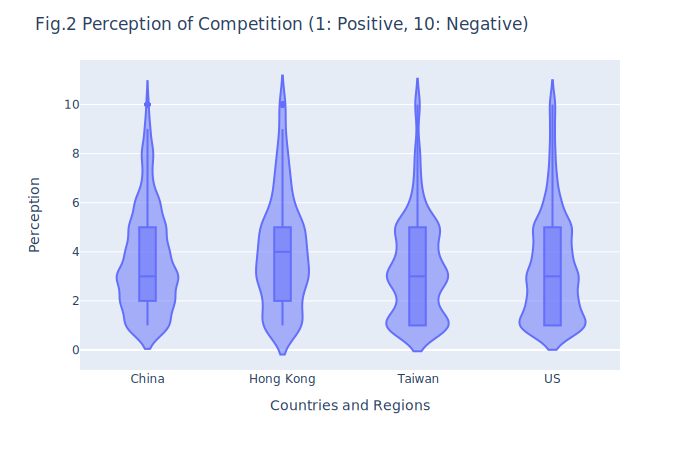

In [24]:
fig = px.violin(WVS_dataset[WVS_dataset['Competition']>0],
                x = 'CountryRegion',
                y = 'Competition',
                box = True)

fig.update_layout(title = 'Fig.2 Perception of Competition (1: Positive, 10: Negative)',
                  xaxis_title = 'Countries and Regions',
                  yaxis_title = 'Perception')

fig.show('svg')

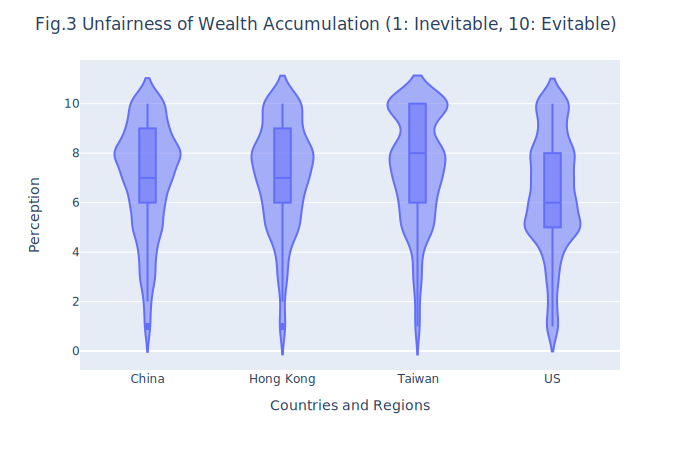

In [25]:
fig = px.violin(WVS_dataset[WVS_dataset['Wealth_accumulation']>0],
             x = 'CountryRegion',
             y = 'Wealth_accumulation',
             box = True)

fig.update_layout(title = 'Fig.3 Unfairness of Wealth Accumulation (1: Inevitable, 10: Evitable)',
                  xaxis_title = 'Countries and Regions',
                  yaxis_title = 'Perception')

fig.show('svg')

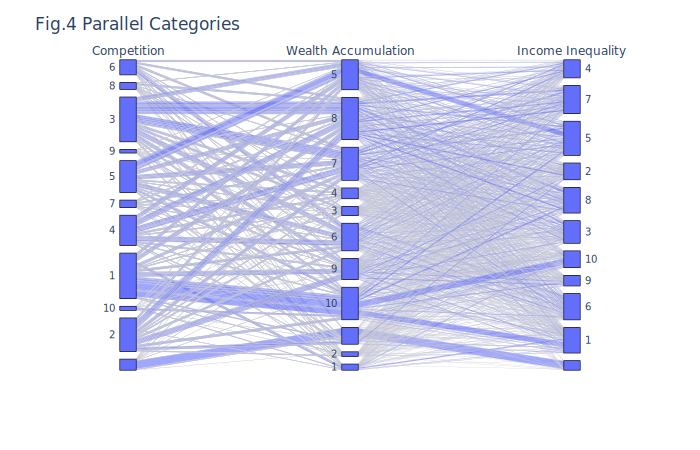

In [26]:
subset_columns = ['Competition', 'Wealth_accumulation', 'Income_equality']

fig = px.parallel_categories(
    WVS_dataset[subset_columns][WVS_dataset[subset_columns]>0 &
    (~WVS_dataset[subset_columns].isnull())],
    labels = {'Wealth_accumulation': 'Wealth Accumulation', 'Income_equality': 'Income Inequality'}
)

fig.update_layout(title = 'Fig.4 Parallel Categories')

fig.show('svg')

In [27]:
df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()

for x in subset_columns:
    for y in subset_columns:
        corr = stats.pearsonr(WVS_dataset[x], WVS_dataset[y])
        df_corr.loc[x, y] = corr[0]
        df_p.loc[x, y] = corr[1]

df_p

,Competition,Wealth_accumulation,Income_equality
Competition,0.000000e+00,1.653268e-22,6.671197e-35
Wealth_accumulation,1.653268e-22,0.000000e+00,1.409953e-173
Income_equality,6.671197e-35,1.409953e-173,0.000000e+00


# Explanations

# Next Steps